___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
import scipy
import netCDF4 as nc
import csv
from numpy import arange, dtype 
import xarray as xr
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20) 
pd.options.display.float_format = "{:.3f}".format # to get rid of logarithmic values
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# Ingest the data to notebook

In [31]:
df=pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/Assigments/Assigment-2/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [34]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 
It can be said that it is a balanced data

In [35]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

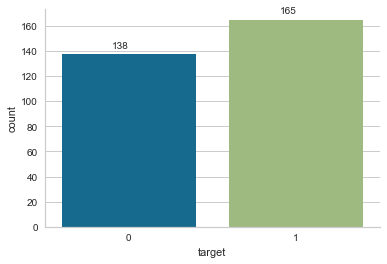

In [36]:
ax = sns.countplot(df["target"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

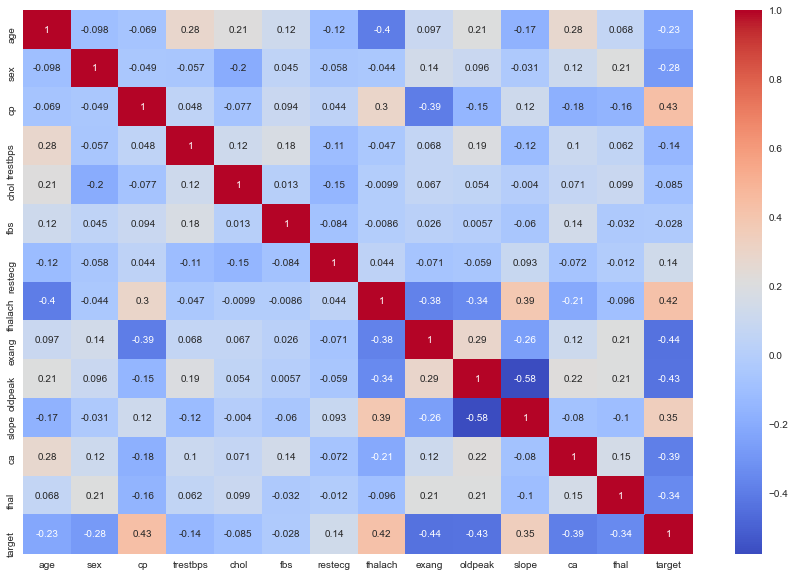

In [37]:
plt.figure(figsize=(15,10))


ax=sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm");

# Data Preprocessing

In [38]:
X=df.drop("target", axis=1)
y=df.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [66]:
log_pred = log_model.predict(X_test_scaled)

In [67]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        85
           1       0.80      0.89      0.84        97

    accuracy                           0.82       182
   macro avg       0.83      0.82      0.82       182
weighted avg       0.83      0.82      0.82       182



In [69]:
scores = cross_validate(log_model, X_train_scaled, y_train, scoring="recall", cv=10, n_jobs=-1)
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.018,0.002,0.857
1,0.019,0.003,0.833
2,0.022,0.006,1.000
3,0.015,0.003,0.714
4,0.025,0.002,0.857
5,0.016,0.002,0.857
6,0.015,0.003,1.000
7,0.015,0.002,0.857
8,0.012,0.002,1.000
9,0.010,0.001,0.857


In [70]:
pd.DataFrame(scores)["test_score"].mean()

0.8833333333333332

In [73]:
log_recall = recall_score(y_test, log_pred)
log_recall

0.8865979381443299

# Implement KNN and Evaluate

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
knn_pred = knn.predict(X_test_scaled)

In [50]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73        85
           1       0.77      0.77      0.77        97

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



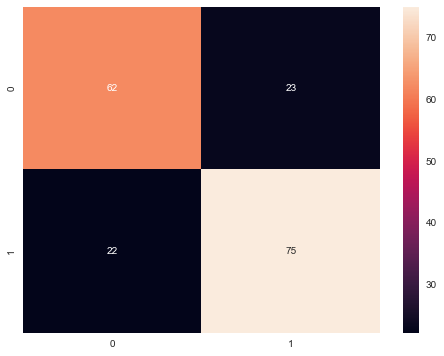

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True);

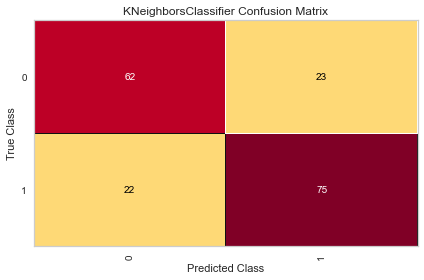

In [54]:
plt.figure(figsize=(6, 4))
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [58]:
knn = KNeighborsClassifier(n_neighbors=13)

In [59]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [60]:
knn_pred = knn.predict(X_test_scaled)

In [61]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        85
           1       0.76      0.90      0.82        97

    accuracy                           0.80       182
   macro avg       0.81      0.79      0.79       182
weighted avg       0.81      0.80      0.79       182



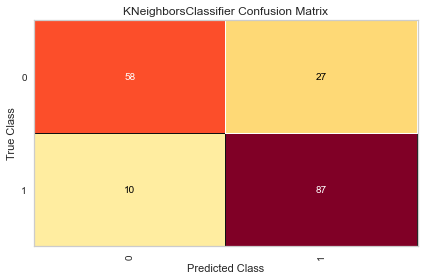

In [63]:
plt.figure(figsize=(6, 4))

cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [65]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=13), X_train_scaled, y_train, cv=10, n_jobs=-1, scoring=["recall"])
pd.DataFrame(scores)

,fit_time,score_time,test_recall
0,0.002,0.003,0.714
1,0.002,0.005,1.000
2,0.004,0.008,1.000
3,0.003,0.004,0.714
4,0.002,0.005,0.857
5,0.003,0.004,0.857
6,0.002,0.004,0.857
7,0.002,0.005,1.000
8,0.001,0.004,1.000
9,0.002,0.004,1.000


In [74]:
knn_recall = recall_score(y_test, knn_pred)
knn_recall

0.8969072164948454

# Visually compare models based on your chosen metric

In [75]:
rec_df = pd.DataFrame({"knn_recall_score": knn_recall,"log_reg_recall_score": log_recall}, index=[0])
rec_df

,knn_recall_score,log_reg_recall_score
0,0.897,0.887


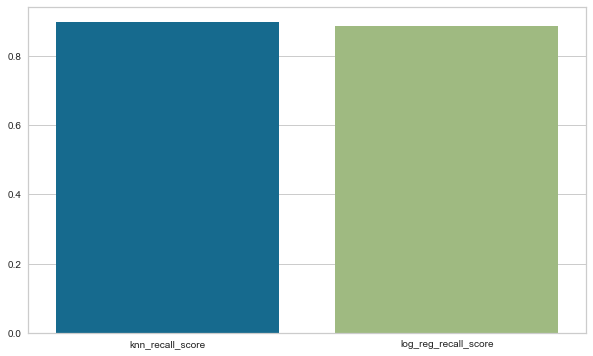

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rec_df.columns, y=rec_df.iloc[0].values);